# Load packages and data

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install missingno
!pip install sklearn.cross_validation

     - 55.6MB 827kB/s
     |████████████████████████████████| 81kB 5.1MB/s 
     |████████████████████████████████| 604kB 18.3MB/s 
     |████████████████████████████████| 3.1MB 26.3MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 296kB 45.8MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=232425 sha256=79b5aa5af9339f671b7af7eb6aeaed8531546fc01b0019546e3bd020ae13bbdb
  Stored in directory: /tmp/pip-ephem-wheel-cache-aaxg6mz5/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=2f6cdcdbc75678fbbe2c88d3a3cbe18b0ec129a3cc8b8ed211ff08aa6a409ba2
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uni

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
import pandas_profiling
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import iplot
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from pandas import DataFrame

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [3]:
creditcard = joined_data = pd.read_csv('data/creditcard.csv')

# EDA

In [4]:
# pandas profiling report saved as html for the entire dataset
profile = creditcard.profile_report(title='Credit Card Data Report', minimal = True)
profile.to_file(output_file="Credit Card Data Report.html")

In [5]:
fraud_df = creditcard.loc[creditcard['Class'] ==1]

In [6]:
# pandas profiling report saved as html for fraud data
profile_fraud = fraud_df.profile_report(title='Fraud Data Report', minimal = True)
profile_fraud.to_file(output_file="Fraud Data Report.html")

In [7]:
# duplicate rows
creditcard[creditcard.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,-1.440241,-0.511918,0.607878,-0.627645,1.023032,-0.888334,0.413444,1.860351,1.316597,1.094512,-0.791037,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [8]:
# get ride of duplicate rows
creditcard = creditcard.drop_duplicates()

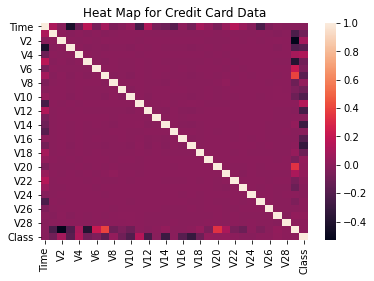

In [9]:
# correlation
corrMatrix = creditcard.corr()
heatmap = sn.heatmap(corrMatrix)
heatmap.set_title('Heat Map for Credit Card Data')
plt.show()

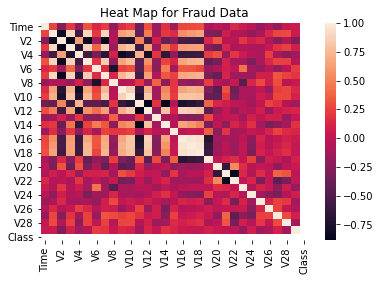

In [10]:
# correlation for fraud
corrMatrix_fraud = fraud_df.corr()
heatmap_fraud = sn.heatmap(corrMatrix_fraud)
heatmap_fraud.set_title('Heat Map for Fraud Data')
plt.show()

In [11]:
# time and class distribution

class_0 = creditcard.loc[creditcard['Class'] == 0]["Time"]
class_1 = creditcard.loc[creditcard['Class'] == 1]["Time"]
#plt.figure(figsize = (14,4))
#plt.title('Credit Card Transactions Time Density Plot')
#sns.set_color_codes("pastel")
#sns.distplot(class_0,kde=True,bins=480)
#sns.distplot(class_1,kde=True,bins=480)
#plt.show()
hist_data = [class_0, class_1]
group_labels = ['normal', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

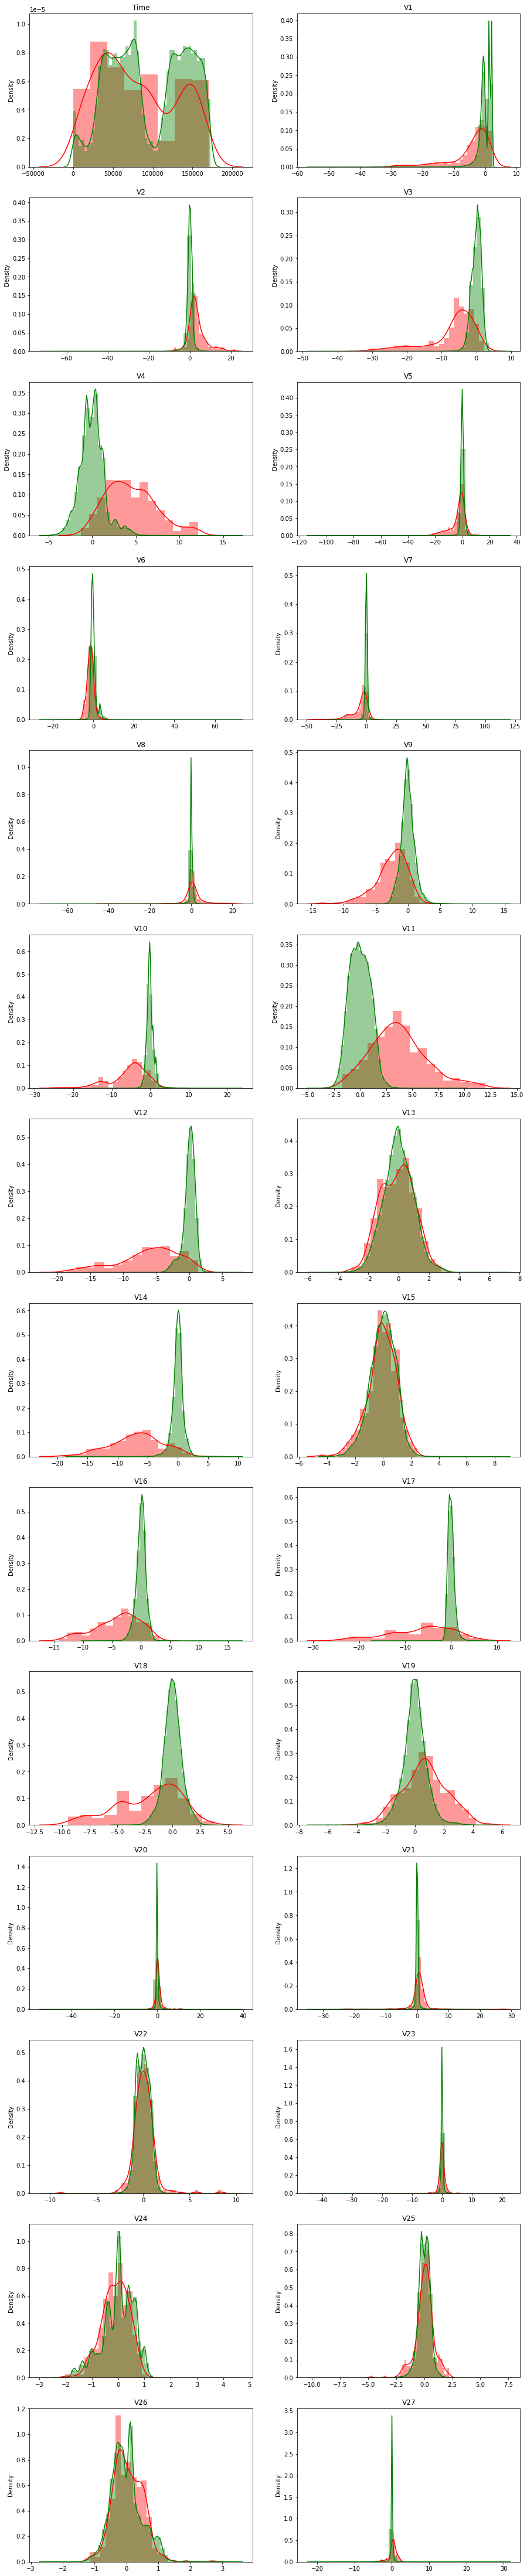

In [12]:
#Looking the V's features
columns = creditcard.iloc[:,0:28].columns

frauds = creditcard.Class == 1
normals = creditcard.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(creditcard[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(creditcard[col][frauds], color='r')
    sns.distplot(creditcard[col][normals], color='g')
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

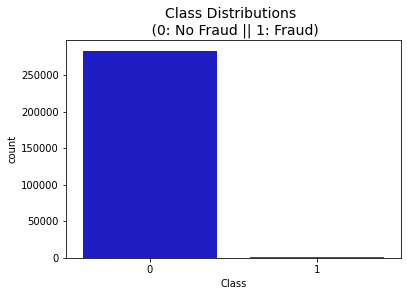

In [13]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=creditcard, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Scaling

In [14]:
#scaling
rob_scaler = RobustScaler()

creditcard['scaled_amount'] = rob_scaler.fit_transform(creditcard['Amount'].values.reshape(-1,1))
creditcard['scaled_time'] = rob_scaler.fit_transform(creditcard['Time'].values.reshape(-1,1))

creditcard.drop(['Time','Amount'], axis=1, inplace=True)

In [15]:
creditcard.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


In [16]:
creditcard_df = creditcard.copy()

# Modeling

In [17]:
def data_prepration(x): 
    x_features= x.iloc[:,x.columns != "Class"]
    x_labels=x.iloc[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,random_state=42,test_size=0.2)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [18]:
clf= RandomForestClassifier(n_estimators=100)

In [19]:
Count_Normal_transacation = len(creditcard_df[creditcard_df["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(creditcard_df[creditcard_df["Class"]==1]) # fraud by 1

Undersampling:


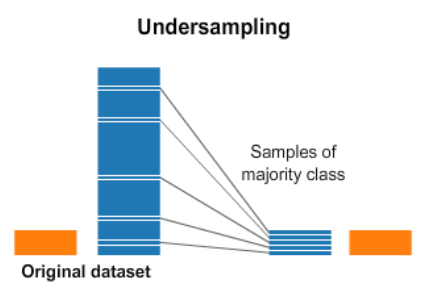

In [20]:

# function for make undersample data with different proportion
# different proportion means with different proportion of normal classes of data
def undersample(normal_indices,fraud_indices,times):#normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = undersample_data.tolist()
    undersample_data = creditcard_df.loc[undersample_data]
    
    print("the normal transacation proportion is :", len(undersample_data[undersample_data["Class"]==0])/len(undersample_data))
    print("the fraud transacation proportion is :", len(undersample_data[undersample_data["Class"]==1])/len(undersample_data))
    print("total number of record in resampled data is:",len(undersample_data))
    return(undersample_data)

In [21]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    pred_prob = clf.predict_proba(features_test)
    accuracy = accuracy_score(labels_test, pred)
    cnf_matrix=confusion_matrix(labels_test,pred)

    fig= plt.figure(figsize=(6,3))# to plot the graph
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    print("TPR for the two class", TPR)
    print("TNR for the two class", TNR)
    print("FPR for the two class", FPR)
    print("FNR for the two class", FNR)
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("Accuracy:", accuracy)
    print("Confusion matrix:", cnf_matrix)
    
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

In [22]:
data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(creditcard_df)

data_train = pd.concat([data_features_train, data_labels_train], axis=1)

length of training data
226980
length of test data
56746


In [23]:
# get index
fraud_indices= np.array(data_train[data_train.Class==1].index)
normal_indices = np.array(data_train[data_train.Class==0].index)

the undersample data for 1 proportion

the normal transacation proportion is : 0.552570093457944
the fraud transacation proportion is : 0.44742990654205606
total number of record in resampled data is: 856
------------------------------------------------------------

the model classification for 1 proportion


TPR for the two class [0.98178481 0.85555556]
TNR for the two class [0.85555556 0.98178481]
FPR for the two class [0.14444444 0.01821519]
FNR for the two class [0.01821519 0.14444444]
TP 77
TN 55624
FP 1032
FN 13


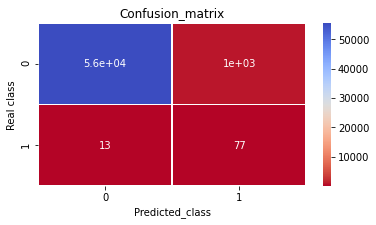

Accuracy: 0.9815846050822965
Confusion matrix: [[55624  1032]
 [   13    77]]

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.07      0.86      0.13        90

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.56     56746
weighted avg       1.00      0.98      0.99     56746

_________________________________________________________________________________________


In [24]:
#let us train this model using undersample data and test for the whole data test set 
print("the undersample data for {} proportion".format(1))
print()
Undersample_data = undersample(normal_indices,fraud_indices,1)
print("------------------------------------------------------------")
print()
print("the model classification for {} proportion".format(1))
print()


undersample_features_train = Undersample_data.loc[:, Undersample_data.columns != 'Class']
undersample_labels_train = Undersample_data.loc[:, Undersample_data.columns == 'Class']
 

#the partion for whole data
print()
model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
# here training for the undersample data but tatsing for whole data
print("_________________________________________________________________________________________")

In [25]:
featimp = pd.Series(clf.feature_importances_,index=data_features_train.columns).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance of the features use

V14              0.169978
V4               0.141971
V10              0.135523
V17              0.074796
V11              0.068590
V3               0.063074
V16              0.052977
V7               0.048574
V12              0.046092
V2               0.024154
V19              0.017522
V21              0.016872
V9               0.016421
V6               0.012050
V18              0.011368
V1               0.010171
V20              0.009933
scaled_amount    0.008753
V26              0.007504
V22              0.007120
V13              0.006910
V8               0.006831
V15              0.005875
V28              0.005843
V24              0.005698
V25              0.005664
V5               0.005646
V23              0.004892
scaled_time      0.004797
V27              0.004400
dtype: float64


Oversampling:

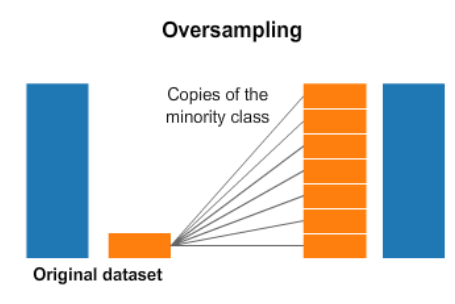

In [26]:
creditcard_df = creditcard.copy()

In [27]:
data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(creditcard_df)

length of training data
226980
length of test data
56746


In [28]:
data_train = pd.concat([data_features_train, data_labels_train], axis=1)

In [29]:
count_class_0, count_class_1 = data_train.Class.value_counts()

In [30]:
df_class_0 = data_train[data_train['Class'] == 0]
df_class_1 = data_train[data_train['Class'] == 1]

In [31]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

Random over-sampling:
1    226597
0    226597
Name: Class, dtype: int64


In [32]:
os_data = df_test_over.copy()

In [33]:
# Now start oversamoling of training data 
# means we will duplicate many times the value of fraud data

print("length of oversampled data is ",len(os_data))
print("Number of normal transcation in oversampled data",len(os_data[os_data["Class"]==0]))
print("No.of fraud transcation",len(os_data[os_data["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data[os_data["Class"]==0])/len(os_data))
print("Proportion of fraud data in oversampled data is ",len(os_data[os_data["Class"]==1])/len(os_data))

length of oversampled data is  453194
Number of normal transcation in oversampled data 226597
No.of fraud transcation 226597
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


the undersample data for 1 proportion

------------------------------------------------------------

the model classification for 1 proportion


TPR for the two class [0.9999647  0.73333333]
TNR for the two class [0.73333333 0.9999647 ]
FPR for the two class [2.66666667e-01 3.53007625e-05]
FNR for the two class [3.53007625e-05 2.66666667e-01]
TP 66
TN 56654
FP 2
FN 24


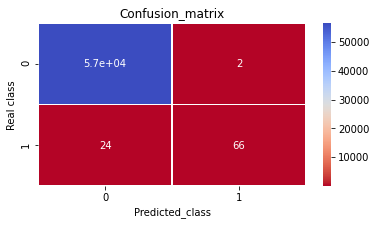

Accuracy: 0.9995418179254926
Confusion matrix: [[56654     2]
 [   24    66]]

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

_________________________________________________________________________________________


In [34]:
print("the undersample data for {} proportion".format(1))
print()
os_data
print("------------------------------------------------------------")
print()
print("the model classification for {} proportion".format(1))
print()

os_features_train = os_data.loc[:, os_data.columns != 'Class']
os_labels_train = os_data.loc[:, os_data.columns == 'Class']
 
#the partion for whole data
print()
model(clf,os_features_train,data_features_test,os_labels_train,data_labels_test)
print("_________________________________________________________________________________________")

In [35]:
featimp = pd.Series(clf.feature_importances_,index=data_features_train.columns).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance of the features use

V14              0.179552
V4               0.123533
V10              0.110765
V12              0.102968
V17              0.079488
V11              0.067455
V16              0.046984
V3               0.046536
V2               0.028541
V21              0.027617
V7               0.025857
V19              0.013796
V18              0.012821
V6               0.011774
scaled_amount    0.011437
V8               0.010884
V20              0.009509
V1               0.009298
V27              0.009183
V28              0.009026
V26              0.007917
V5               0.007793
V13              0.007138
V9               0.007130
scaled_time      0.006015
V15              0.005915
V25              0.005825
V22              0.005754
V23              0.005096
V24              0.004393
dtype: float64


SMOTE:

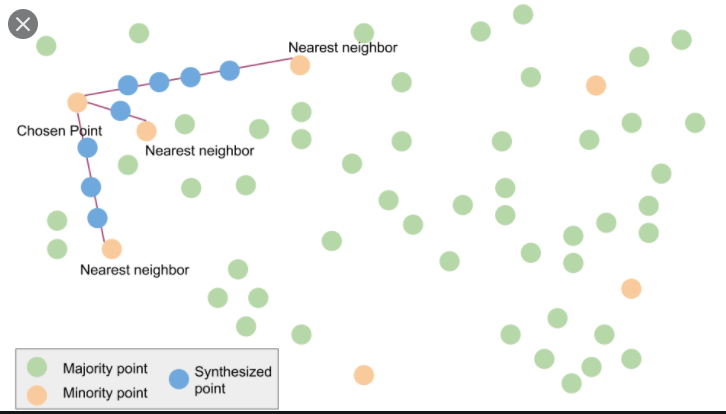

In [36]:
creditcard_df = creditcard.copy()

In [37]:
os = SMOTE(random_state=0) #   We are using SMOTE as the function for oversampling
# now we can devided our data into training and test data
# Call our method data prepration on our dataset
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(creditcard_df)
columns = data_train_X.columns

length of training data
226980
length of test data
56746


In [38]:
os_data_X,os_data_y=os.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of normal transcation in oversampled data",len(os_data_y[os_data_y["Class"]==0]))
print("Number of fraud transcation",len(os_data_y[os_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data_y[os_data_y["Class"]==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y["Class"]==1])/len(os_data_X))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



length of oversampled data is  453194
Number of normal transcation in oversampled data 226597
Number of fraud transcation 226597
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


TPR for the two class [0.9998941  0.78888889]
TNR for the two class [0.78888889 0.9998941 ]
FPR for the two class [2.11111111e-01 1.05902287e-04]
FNR for the two class [1.05902287e-04 2.11111111e-01]
TP 71
TN 56650
FP 6
FN 19


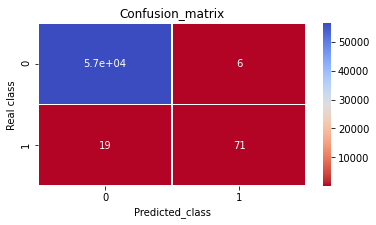

Accuracy: 0.9995594403129736
Confusion matrix: [[56650     6]
 [   19    71]]

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.92      0.79      0.85        90

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [39]:
model(clf,os_data_X,data_test_X,os_data_y,data_test_y)

In [40]:
featimp = pd.Series(clf.feature_importances_,index=data_train_X.columns).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance of the features use

V14              0.133076
V4               0.108982
V10              0.103414
V17              0.089943
V11              0.088474
V12              0.080458
V16              0.068033
V3               0.059033
V2               0.048941
V7               0.033150
V21              0.017505
V27              0.017025
V18              0.014198
V8               0.013200
V9               0.013057
V19              0.011474
V6               0.011023
V5               0.010879
V1               0.009975
scaled_amount    0.009446
V13              0.007614
V20              0.007336
scaled_time      0.007146
V26              0.005800
V28              0.005734
V23              0.005467
V22              0.005255
V15              0.005176
V25              0.005067
V24              0.004121
dtype: float64


In [41]:
df_feature_importance = DataFrame(featimp).reset_index(inplace=False)

In [42]:
df_feature_importance = df_feature_importance.rename(columns = {'index':'feature', 0:'importance'})

In [43]:
df_feature_importance

,feature,importance
0,V14,0.133076
1,V4,0.108982
2,V10,0.103414
3,V17,0.089943
4,V11,0.088474
5,V12,0.080458
6,V16,0.068033
7,V3,0.059033
8,V2,0.048941
9,V7,0.033150


In [44]:
top_10 = df_feature_importance.iloc[0:10,]

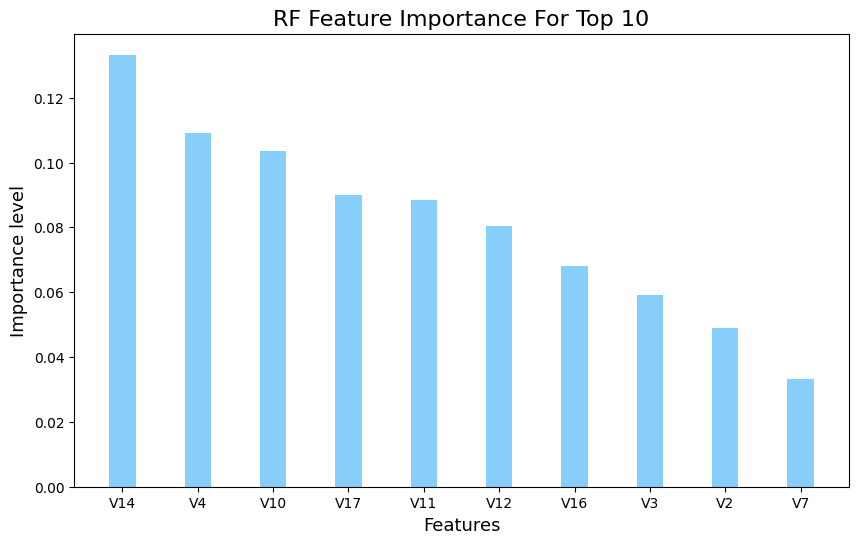

In [45]:
# Create 18 x 6 windows and set the dpi = 100
plt.figure(figsize=(10, 6), dpi=100)
# Create 1 x 1 graph
plt.subplot(1, 1, 1)
# bar number
N = 10
# each bar's value
values = top_10['importance']
# include the Number for bars
index = np.arange(N)
# bar width
width = 0.35
# set the bar color
p2 = plt.bar(index, values, width, color="#87CEFA")
#set the x label
plt.xlabel('Features',fontsize = 13)
# set y label
plt.ylabel('Importance level',fontsize = 13)
# set title
plt.title('RF Feature Importance For Top 10',fontsize = 16)
# set the ticks
plt.xticks(index, top_10['feature'])
plt.show()